<p style="align: center;"><img src="http://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

## <h3 style="text-align: center;"><b>Installing PyTorch</b>

Go to [pytorch.org](https://pytorch.org/) and install PyTorch version choosing your system preferences.

In [1]:
import torch

PyTorch is a deep learning framework, build on 3 main components.

$$ PyTorch = NumPy + CUDA +Autograd$$

PyTorch works with ``tensor`` data structure, which is similar to NumPy's ``ndarray``, except that:
 1. tensors can run on GPUs or other hardware accelerators via [CUDA](http://en.wikipedia.org/wiki/CUDA)
 2. tensors are also optimized for automatic differentiation (Autograd)

Tensor is a multi-dimensional array:
- a scalar is a zero dimensional tensor : `` x = 9 # shape ([])``
- a vector, is a 1d tensor : `` y = [9, 5, 10] # shape ([3])``
- a matrix is a 2d tensor : `` z = [[9, 5, 10], [12, 6, 3]] # shape ([2, 3])``
- a 3d array is a 3d tensor: `` t = [[[9, 5, 10], [12, 6, 3]], [[7, 4, 11], [2, 13, 8]]] # shape ([2, 2, 3])``

## <h3 style="text-align: center;"><b> Creating a tensor</b>

There are a few ways to create a tensor, depending on your use case:
1. directly from pre-existing data, like Python list or any sequence, NumPy array, etc.
2. creating a tensor with a specific shape, filled with random or constant values
3. from another tensor, keeping its shape and type

 To create a tensor with pre-existing data, use ``torch.tensor()``

In [2]:
# create a 1D tensor from a Python list.
data = [1, 2, 3]
torch.tensor(data) #, dtype=torch.float32, device="cpu", requires_grad=True) # The data type is automatically inferred.

tensor([1, 2, 3])

In [3]:
# create a 2D tensor from a numpy matrix
import numpy as np

data = np.array([[1, 2, 3], [4, 5, 6]])
torch.tensor(data)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

<h6 style="text-align"><b> From NumPy to PyTorch and viceversa</b>

In [4]:
import numpy as np
np_array = np.array(data)

t = torch.from_numpy(np_array)    # creates a tensor that shares storage with a NumPy array
t.numpy()                         # back to numpy

array([[1, 2, 3],
       [4, 5, 6]])

<h6 style="text-align: center;"><b> Tensors of a specific data type </b>

To create a tensor having a predefined shape and a specific type use a constructor for that data type.\
You need to pass in the shape of your tensor as a tuple of ints, specifying the number of elements in each dimension.\
The constructor will create a tensor with a given shape and fill it with trash.

In [5]:
# Commonly used tensor types:

torch.IntTensor       # torch.32int  == torch.int
torch.LongTensor      # torch.64int  == torch.long

torch.FloatTensor     # torch.32float == torch.float
torch.DoubleTensor    # torch.64float == torch.double

torch.DoubleTensor

In [6]:
# create a 1D integer tensor

x = torch.IntTensor(10)   
x

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [7]:
# create a 3D floaing point tensor

x = torch.FloatTensor(2, 2, 5)    #same as torch.Tensor(shape)
x

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [8]:
# create a 2D boolean tensor 

x = torch.BoolTensor(3, 2)
x

tensor([[False, False],
        [False, False],
        [False, False]])

### <h3 style="text-align: center;"><b> Initializing a tensor</b>

You can initialize a tensor with random values sampled from some distribution or fill it with a constant value.\
Use familiar functions as in NumPy: ``torch.zeros()``,  ``torch.ones()``, ``torch.rand()``, ``torch.ones_like()``, etc.

<h6 style="text-align: center;"><b> Dummy tensors of zeros and ones </b>

In [9]:
torch.zeros(2, 4)                             # initialize with zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [10]:
torch.ones(2, 4)                              # initialize with ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

<h6 style="text-align: center;"><b>Sampling values uniformly from [0, 1) </b>

In [11]:
torch.rand(2, 4)                          # FloatTensor from Uniform[0, 1)        

tensor([[0.3765, 0.2289, 0.1797, 0.4866],
        [0.2766, 0.7027, 0.2213, 0.3312]])

<h6 style="text-align: center;"><b>Sampling integers uniformly from [low, high) </b>

In [12]:
torch.randint(low=2, high=7, size=(2, 4))   # IntTensor from Uniform[2, 7)

tensor([[5, 4, 2, 6],
        [6, 2, 6, 5]])

<h6 style="text-align: center;"><b>Sampling from normal distribution</b>

In [13]:
torch.randn(2, 4)                          # FloatTensor from Normal(0, 1) 
torch.normal(mean=5, std=2, size=(2, 4))   # FloatTensor from Normal(5, 2)

tensor([[6.7647, 4.7727, 6.0059, 6.2774],
        [4.4821, 5.2869, 5.1658, 0.0220]])

<h4 style="text-align: center;"><b> Changing the content of an existing tensor </b>


Most PyTorch functions have an equivalent method with an underscore ``_``,\
which modifies the object in place, instead of creating a copy of the original object.

In [29]:
t = torch.FloatTensor(2, 3)
t

tensor([[1.3445e+22, 6.6012e-07, 4.1729e-08],
        [8.5454e-07, 2.1156e+23, 1.6852e+22]])

In [30]:
t.zero_()    

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [26]:
t.zero_()                   # replace all values with zeros
t.uniform_()                # replace with values from a continuous random Uniform[from, to)
t.normal_(mean=3)           # replace with values from a Normal(mean, std) 
t.fill_(8)                  # fill tensor with a constant value

tensor([[8., 8., 8.],
        [8., 8., 8.]])

## <h3 style="text-align: center;"><b> Attributes of a Tensor </b>

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [27]:
print(t)
print("Shape:",   t.shape)  #  t.size()
print("Type:",    t.dtype)  #  t.type()
print("Device:",  t.device)

tensor([[8., 8., 8.],
        [8., 8., 8.]])
Shape: torch.Size([2, 3])
Type: torch.float32
Device: cpu


<h4 style="text-align: center;"><b> Changing tensor's type </b>

In [33]:
t = t.to(torch.bool)
t

tensor([[False, False, False],
        [False, False, False]])

<h4 style="text-align: center;"><b> Changing tensor's device </b>

We can use both CPU (Central Processing Unit) and GPU (Graphical Processing Unit) to make the computations with PyTorch.\
By default all tensors are allocated on the CPU memory, where the computation is performed.\
If you have a GPU, you can access its memory via a specialized API called CUDA.\
Move tensors from cpu to cuda and viceversa by using the ``.to(device)`` method. 

In [34]:
t = t.to("cuda")
t.device

device(type='cuda', index=0)

In [19]:
# can change dtype and device at the same time
t = t.to("cpu", torch.double)

<h4 style="text-align: center;"><b> Specify dtype and device at creation time </b>

In [35]:
t = torch.tensor([1,2,3,4,5], dtype = torch.long, device="cpu")
t.dtype

torch.int64

<h6 style="text-align"><b> 1. Check if cuda is available</b>

In [36]:
torch.cuda.is_available()

True

<h6 style="text-align"><b> 2. Move tensor to device </b>

In [380]:
t = t.to("cuda")                    # t.cpu() or t.cuda()
t.device

Device: cpu


<h6 style="text-align"><b> Perform computations on GPU and move the results to CPU </b>

<h3 style="text-align: center;"><b> Example </b>

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

a = torch.FloatTensor(5, 2).uniform_()
b = torch.clone(a)

c = (a.to(device) + b.to(device))
c.to("cpu").device

device(type='cpu')

<h6 style="text-align"><b> To perform computations all tensors need to be on the same device ! </b>

In [ ]:
a.cpu() + b.cuda() # will raise an error: expected all tensors to be on the same device, but found two devices

## <h3 style="text-align: center;"><b> Reshaping a tensor </b>

In [43]:
# create a 1D tensor filled with values in a given range
t = torch.arange(0, 10, step=1) # [start=0, end=10, step=1)
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

 <h6 style="text-align: center;"><b>Reshape from 1d to 2d </b> 

``[10] -> [2, 5]``

Method ``.view()`` returns a view of the original tensor.  
The returned tensor shares the same data and must have the same number of elements, but may have a different size. \
Both tensors also share the same memory storage, meaning that all changes to the new tensor will affect the original tensor.

In [44]:
y = t.view(2, 5) 
y 

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [321]:
# the size -1 is inferred from other dimensions
t.view(2, -1)  

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [45]:
t.view(-1, 2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [323]:
# flattening all dimensions
t.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [324]:
# Since y and t share the storage, any assignment to y will change t
y[0] = 10 
t         

tensor([10, 10, 10, 10, 10,  5,  6,  7,  8,  9])

#### View VS Reshape

In [284]:
y = t.reshape(2, 5) # may create a copy
y.is_contiguous()

True

``view()`` will try to change the shape of the tensor while keeping the underlying data allocation the same,\
``reshape()`` will create a new underlying memory allocation if necessary.

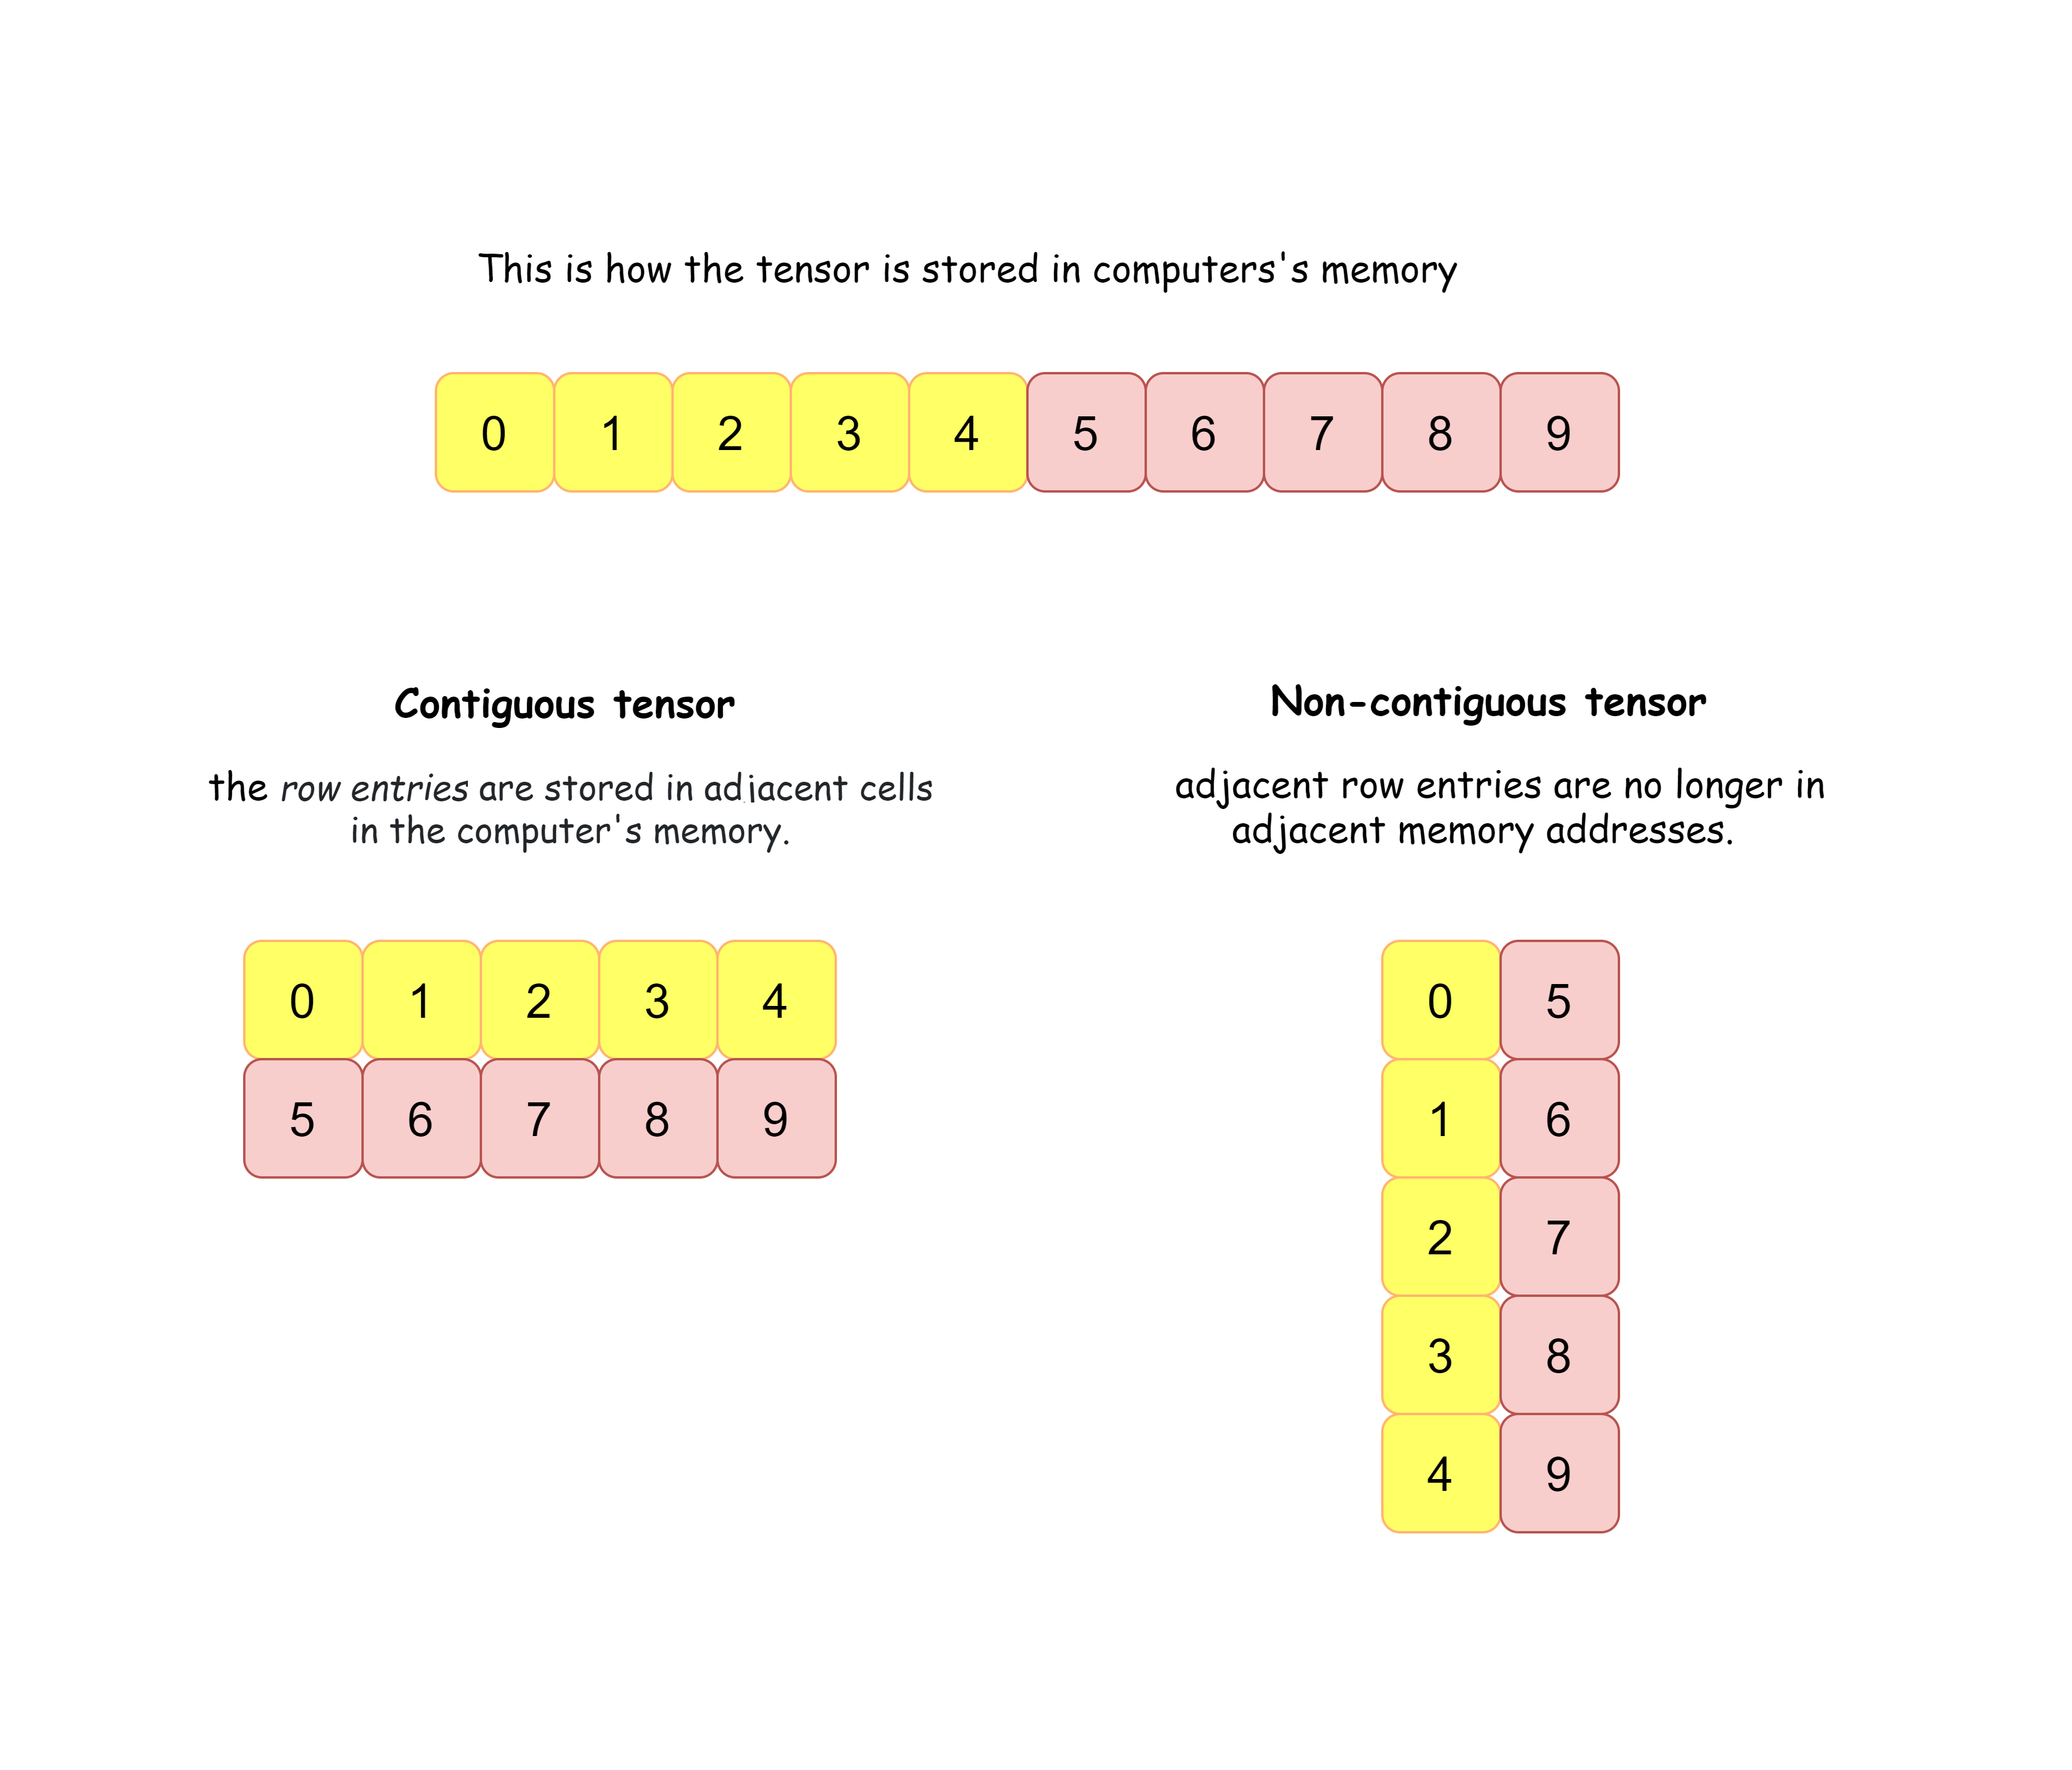

In [285]:
# a transpose is no longer a contiiguous tensor
y = t.T
y.is_contiguous()

False

In [310]:
y.view(2, 5)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [ ]:
# solution 1:
y.contiguous() # creates a copy

#solution 2:
y.reshape() # creates a copy

In [309]:
y.contiguous().storage()

 0
 5
 1
 6
 2
 7
 3
 8
 4
 9
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 10]

<h6 style="text-align:  center;"><b> Add/Remove a dummy dimension of size 1</b> 

``[2, 5] -> [1, 2, 5]``

In [48]:
# Returns a new tensor with a dimension of size one inserted at the specified position
b = y.unsqueeze(2)
b.shape

torch.Size([2, 5, 1])

``[1, 2, 5] -> [2, 5]``

In [49]:
# Returns a tensor with all the dimensions of size `1` removed.
b.squeeze() 

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [329]:
y = torch.arange(0, 10, step=1).view(2, 5)

print("Shape:", y.shape)
print(y)

Shape: torch.Size([2, 5])
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


<h6 style="text-align:  center;"><b> Insert a new dimension of size 1</b> 

``[2, 5] -> [2, 5, 1]``

In [148]:
b = y.unsqueeze(2) 
print("Shape:", b.shape)
print(b)

Shape: torch.Size([2, 5, 1])
tensor([[[0],
         [1],
         [2],
         [3],
         [4]],

        [[5],
         [6],
         [7],
         [8],
         [9]]])


<h6 style="text-align:  center;"><b> Expand dimension(s) of size 1 to a larger size</b> 

``[2, 5, 1] -> [2, 5, 10]``

In [149]:
b.expand(-1, -1, 10) # passing -1  as the size for a dimension means not changing the size of that dimension

tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
         [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]],

        [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
         [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
         [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
         [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]])

<h6 style="text-align:  center;"><b> Exchange the order of dimenstions </b> 

``[2, 5, 1] -> [1, 5, 2]``

In [151]:
x = b.transpose(0, 2)    # Swaps 1nd and 3rd dimension
x = b.permute(2, 1, 0)   # specify the desired ordering for all dimensions

print(x)

tensor([[[0, 5],
         [1, 6],
         [2, 7],
         [3, 8],
         [4, 9]]])


<h6 style="text-align:  center;"><b> Remove dimension(s) of size 1</b> 

``[1, 5, 2] -> [2, 5]``

In [328]:
y = x.squeeze(0)
y

tensor([[ 1.2709,  1.0186, -0.1586, -2.0512, -1.0564],
        [ 1.1229, -2.4668, -1.6884,  0.0581, -0.6765]])

<h6 style="text-align:  center;"><b> Flatten </b> 

``[2, 5] -> [10]``

In [136]:
# flatten
t = y.reshape(-1)
t

tensor([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

<h3 style="text-align: center;"><b> Standard NumPy indexing and slicing </b>

In [204]:
t = torch.arange(15).view(5, 3)
t

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [202]:
# specify indexes and slices inside [], separated by comma 
print("First row:",  t[0])
print("First column:", t[:, 0])
print("Second and third values in the last column:", t[[1, 2], -1])

First row: tensor([0, 1, 2])
First column: tensor([ 0,  3,  6,  9, 12])
Second and third values in the last column: tensor([5, 8])


In [171]:
t[:, 1] = 0 # zero-out second column
print(t)

tensor([[ 0,  0,  2],
        [ 3,  0,  5],
        [ 6,  0,  8],
        [ 9,  0, 11],
        [12,  0, 14]])


<h6 style="text-align"><b>Selecting elements via boolean mask</b> 

In [254]:
t[t < 5]

tensor([0, 1, 2, 3, 4])

## <h3 style="text-align: center;"><b> Arithmetic operations on tensors </b>

| Python operator | PyTorch method |
|:-:|:-:|
|+| torch.add() |
|-| torch.sub() |
|*| torch.mul() |
|/| torch.div() |

<h6 style="text-align"><b> Element-wise operations on tensors</b> 

In [313]:
t + t
t - t
t * t
t / t

tensor([nan, 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [208]:
t.log()

tensor([  -inf, 1.6094, 0.0000, 1.7918, 0.6931, 1.9459, 1.0986, 2.0794, 1.3863,
        2.1972])

In [210]:
t.exp()

tensor([1.0000e+00, 1.4841e+02, 2.7183e+00, 4.0343e+02, 7.3891e+00, 1.0966e+03,
        2.0086e+01, 2.9810e+03, 5.4598e+01, 8.1031e+03])

In [259]:
t.sqrt()

tensor([0.0000, 2.2361, 1.0000, 2.4495, 1.4142, 2.6458, 1.7321, 2.8284, 2.0000,
        3.0000])

In [314]:
t.pow(2)

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## <h3 style="text-align: center;"><b> Aggregating operations on tensors </b>

Aggregating functions as in NumPy: ``sum()``, ``mean()``, ``min()``, ``max()``.\
Aggragation can operate along a give axis, that you specify with ``dim`` parameter. 

In [51]:
t = torch.tensor([[1,2,3], [4,5,6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

<h4 style="text-align: center;"><b> sum (dim) / mean (dim) </b>

In [190]:
t.sum(dim=0)           # collapsing rows

tensor([5, 7, 9])

In [191]:
t.sum(dim=1)          # collapsing columns

tensor([ 6, 15])

After aggregating, you may end up with a one-element tensor,\
you can convert it to a Python numerical value using ``item()``.

In [53]:
t.sum().item()

21

<h4 style="text-align: center;"><b> max (dim) / min (dim)</b>

Returns a **namedtuple (values, indices)** \
where ``values`` is the maximum/minimum value of each row of the tensor in a given dimension.\
And ``indices`` is the index of each maximum/minimum value found (``argmin``).

In [193]:
values, indices = t.max(dim=1) # find max in each row
print(values)
print(indices)

tensor([3, 6])
tensor([2, 2])


In [188]:
t.max().item() # find a global maximum

2

<h4 style="text-align: center;"><b> argmax (dim) / argmin (dim)</b> 

Returns the **indices** of the maximum/minimum values of a tensor across a dimension.

In [194]:
t.argmax(dim=1)

tensor([2, 2])

<h4 style="text-align: center;"><b>topk ( k, dim, largest )</b> 

Returns a **namedtuple of (values, indices)** \
with values and indices of ``k`` largest/smallest elements of a tensor along ``dim``.

In [195]:
values, integers = t.topk(k=1, dim=1, largest=False)
print("Values:", values)
print("Indices:", indices)

Values: tensor([[1],
        [4]])
Indices: tensor([2, 2])


## <h3 style="text-align: center;"><b>[Dot product vs Matrix Multiplication](https://mkang32.github.io/python/2020/08/30/numpy-matmul.html) </b>

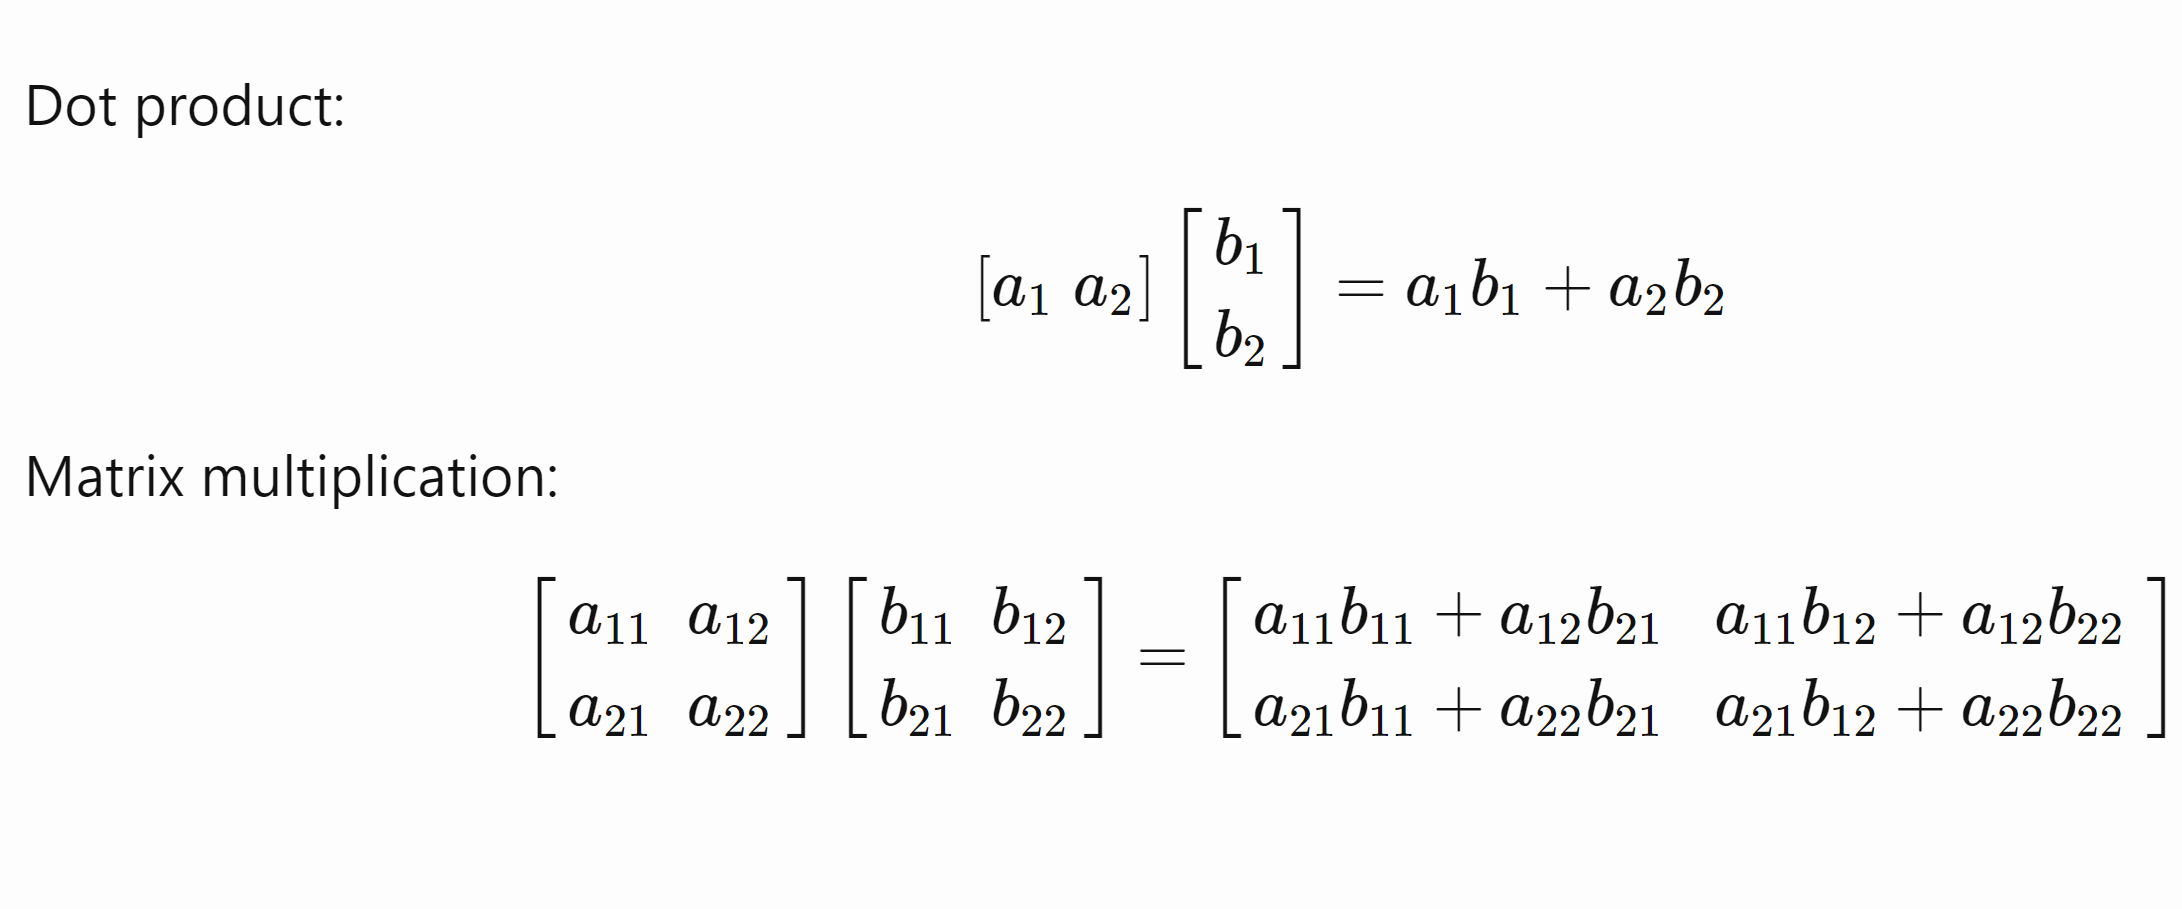

<h4 style="text-align"><b> Dot product</b> 

In [46]:
# create two 1D tensors
a = torch.arange(0, 10)
b = torch.clone(a)

 Computes the inner product of 1D tensors.\
 ``(10) @ (10) -> (1) ``

In [50]:
a.dot(b)                                           # same as a @ b                           

tensor(285)

In [51]:
a @ b

tensor(285)

<h4 style="text-align"><b> Matrix multiplication</b> 

In [73]:
# Number of columns in the first tensor should match up with the number of rows in the second tensor!

a = torch.randn(2, 5) #shape (2, 5)
b = a.transpose(0, 1) #shape (5, 2)

 ``torch.mm(tensor1, tensor2)`` Performs a matrix multiplication of 2D tensors.\
  ``(2, 5) @ (5, 2) -> (2, 2) ``

In [64]:
torch.mm(a, b)       # same as a @ a.T

tensor([[1.8894, 0.3328],
        [0.3328, 8.9961]])

In [65]:
a @ b

tensor([[1.8894, 0.3328],
        [0.3328, 8.9961]])

<h4 style="text-align"><b>Batch multiplication</b> 

In [74]:
a = a.unsqueeze(0)      #shape: (1, 2, 5)
b = a.transpose(1, 2)   #shape: (1, 5, 2)
a.shape, b.shape

(torch.Size([1, 2, 5]), torch.Size([1, 5, 2]))

``torch.bmm(tensor1, tensor2)`` Performs a batch matrix-matrix product of 3D tensors. \
``(1, 2, 5) @ (1, 5, 2) -> (1, 2, 2)``

In [75]:
torch.bmm(a, b)    # same as b @ b.transpose(1, 2)

tensor([[[5.6995, 0.5569],
         [0.5569, 4.1483]]])

In [57]:
a @ b

tensor([[[ 30,  80],
         [ 80, 255]]])

<h4 style="text-align"><b>Universal solution for matrix multiplication</b> 

``torch.matmul(tensor1, tensor2)`` a PyTorch equivalent of Python operator ``@``.\
Performs the product on two last dimensions of tensors.

### Exercise

Let's write one neuron that transforms a tensor of features X, by multiplying it with a vector of weights, and applies a sigmoid activation.

In [54]:
def forward_pass(inputs, weights):
    return torch.sigmoid(inputs @ weights)

In [55]:
# create some data
x = torch.randn(2, 5)
weights = torch.randn(5)
print(x, weights)

# transform features
forward_pass(x, weights)

tensor([[ 0.5905,  0.8062, -1.3452,  1.4567, -0.1275],
        [ 0.3778,  0.7697, -0.8817, -1.0119,  1.4523]]) tensor([ 0.6872,  1.7585, -1.0055,  0.7218, -0.0412])


tensor([0.9857, 0.8468])

## <h3 style="text-align: center;"><b> Joining multiple tensors </b>

In [165]:
# create 2 tensors 
t1 = torch.arange(6).view(2, 3)
t2 = torch.arange(6).view(2, 3)
t1, t2

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0, 1, 2],
         [3, 4, 5]]))

<h4 style="text-align: center;"><b>torch.cat ( (tensors), dim=0 )</b> 

In [155]:
print("Concat tensors one on top of the other (default):")
print(torch.cat((t1, t2), dim=0))

Concat tensors one on top of the other (default):
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [156]:
print("Concat tensors side by side:")
print(torch.cat((t1, t2), dim=1))

Concat tensors side by side:
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


<h4 style="text-align: center;"><b>torch.stack ( (tensors), dim=0 )</b> 

``dim`` is a new dimension to insert

In [167]:
torch.stack((t1, t2), dim=0)

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

**Difference between ``torch.stack`` and ``torch.cat``** :\
``torch.stack`` creates a new dimension to stack tensors, while ``torch.cat`` not.

In [24]:
# Computation graph

x = torch.ones(2, 3)
w = torch.rand(1, 3, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
y = (w * x) + b
print(y)
y = y.mean()
y.backward()
w.grad, b.grad

tensor([[0.9491, 0.7620, 0.8040],
        [0.9491, 0.7620, 0.8040]], grad_fn=<AddBackward0>)


(tensor([[0.3333, 0.3333, 0.3333]]), tensor([1.]))

## <h3 style="text-align: center;"><b> Practice </b>

1. Create a 2D tensor and add a batch dimension of size 1
2. Create a random tensor of shape 5x3 in the interval [3, 7)
3. Create a tensor with values from a normal with mean=0, std=3
4. Perform a batch product between 3D tensors
5. Return a batch matrix product between a 3D tensor and a 2D tensor